# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Redes Neuronales</center>
### <center> Práctica RN con Keras para regresión</center>


Link interesantes: <br>
https://www.tensorflow.org/ <br>
https://keras.io/

### Redes Neuronales con Keras - Regresión



Import de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

np.random.seed(1)
tf.random.set_seed(1)

Funciones de uso general

In [2]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

## Entrena un modelo de Redes Neuronales para regresión
Vamos a predecir el consumo de un vehículo (`MPG`, millas por galón) en base a la cantidad de caballos de fuerza del mismo (atributo `Horsepower`).

In [3]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset_trabajo=pd.read_csv("../datasets/dataset_regre_rn_2.csv", 
                            names=column_names,
                            na_values='?', comment='\t',
                            sep=' ', 
                            skipinitialspace=True)

dataset_trabajo = dataset_trabajo.dropna()

In [4]:
dataset_trabajo.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset_trabajo.shape

(392, 8)

In [6]:
columnas_predictoras=dataset_trabajo.columns.to_list()
columnas_predictoras.remove('MPG')
columnas_predictoras

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Origin']

In [7]:
variable_predictora="Horsepower"

x_train, x_test, y_train, y_test = train_test_split(dataset_trabajo.loc[:,variable_predictora],dataset_trabajo.loc[:,'MPG'],test_size=0.2)

In [8]:
x_train

338     84.0
260    110.0
141     83.0
312     65.0
353     74.0
       ...  
205     75.0
257     90.0
73     130.0
237     63.0
38     165.0
Name: Horsepower, Length: 313, dtype: float64

In [9]:
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

StandardScaler()

In [10]:
x_train_transform=sscaler.transform(pd.DataFrame(x_train))
x_test_transform=sscaler.transform(pd.DataFrame(x_test))

#### Modelo 1

In [47]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,))]) #, activation="relu"

In [42]:
modelo1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


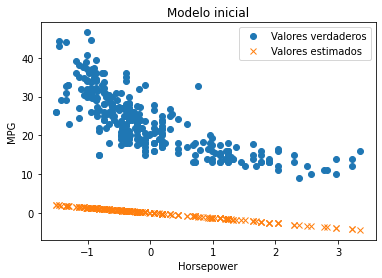

In [43]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo inicial",xlabel="Horsepower",ylabel="MPG")

In [44]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [45]:
# Entrenamiento del modelo
modelo1.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

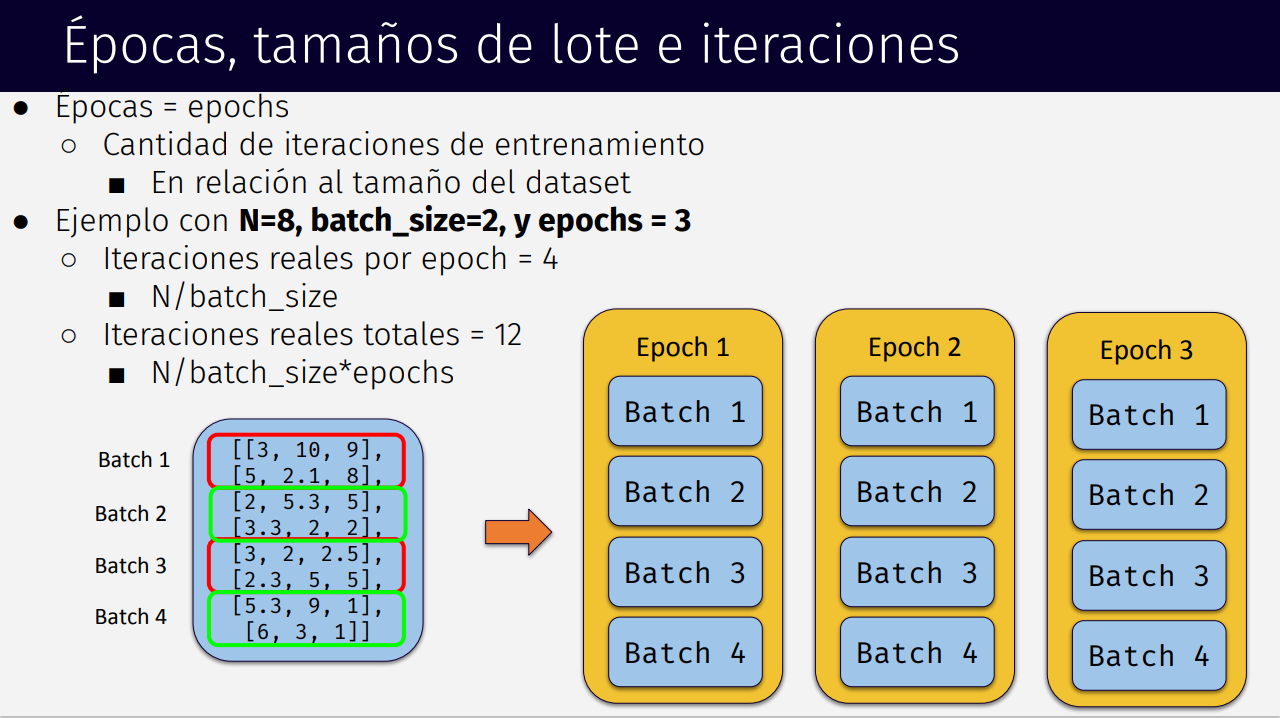

Miremos como la red aprendio los datos con los que fue entrenada

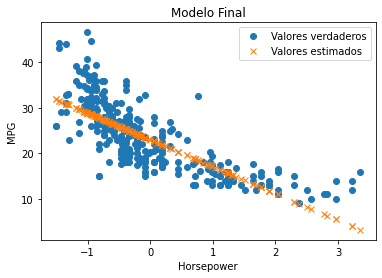

In [46]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

Miremos como la red predice

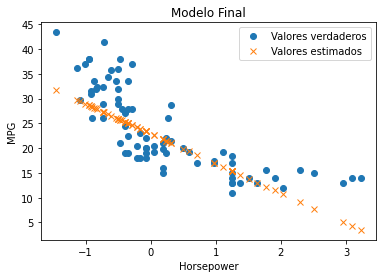

In [21]:
plot_regression(modelo1,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

In [22]:
y_pred_modelo1=modelo1.predict(x_test_transform)

mae_modelo1=mean_absolute_error(y_test,y_pred_modelo1)
mse_modelo1=mean_squared_error(y_test,y_pred_modelo1)

print(f"Error absoluto medio {mae_modelo1}")
print(f"Error cuadrático medio {mse_modelo1}")

Error absoluto medio 4.348072440714776
Error cuadrático medio 30.27512618938826


#### Modelo 2

Creamos el modelo

In [23]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo2 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(2, activation="tanh" ),
    keras.layers.Dense(d_out, )])

In [24]:
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 4         
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [25]:
modelo2.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

In [26]:
# Entrenamiento del modelo
modelo2.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

Este es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, cada ciclo los 1000 datos pasaran por la red neuronal. Si se especifica el parametro batch size cada ciclo (epoch) tendra más ejecuciones internas, estas ejecuciones se llaman iteraciones, si tenemos un batch size de 100, se tendran 10 iteraciones para completar un ciclo, en cada iteración se ejecutan los algoritmos de forwardpropagation y backpropagation, de esta manera la red neuronal actualiza más veces los parametros W (pesos) y b (bias).

Verificamos cómo aprendio los datos de entrenamiento

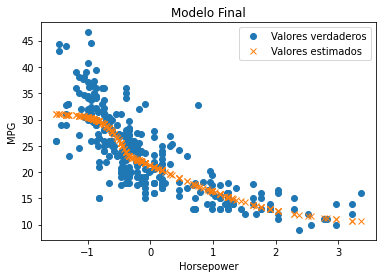

In [27]:
plot_regression(modelo2,x_train_transform,y_train,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

Evaluamos el modelo en el dataset de test

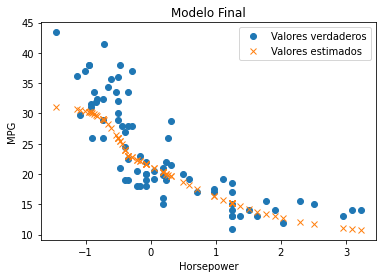

In [33]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

In [30]:
y_pred=modelo2.predict(x_test_transform)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

Error absoluto medio 3.6158359986317308
Error cuadrático medio 23.351659523031675


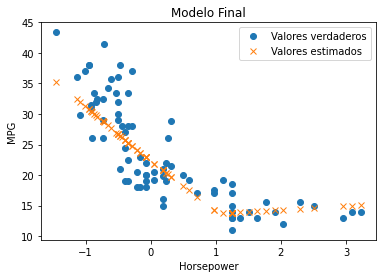

In [40]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo3 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(50, activation="relu" ),
    keras.layers.Dense(d_out, )])

modelo3.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

modelo3.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

plot_regression(modelo3,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

Comparamos con el modelo 2

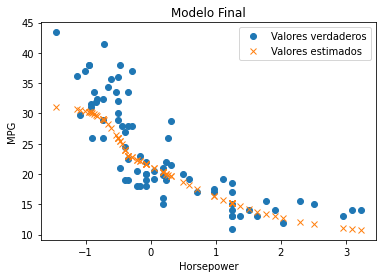

In [39]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")